# Spanish Translation A/B Test

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chisquare

%matplotlib inline
matplotlib.style.use('ggplot')

#### Data Exploration 

In [4]:
test_df = pd.read_csv('test_table.csv')
user_df = pd.read_csv('user_table.csv')

#### Clean Up

In [5]:
combined_df = pd.merge(test_df, user_df, on='user_id', how='left')
combined_df2 = combined_df[combined_df['sex'].isnull()]
combined_df2.groupby('test')['conversion'].mean()

test
0    0.077551
1    0.057416
Name: conversion, dtype: float64

##### Feature Generation

In [6]:
combined_df[combined_df['test'] == 0].groupby('country')['conversion'].mean().sort_values()


country
Uruguay        0.012048
Argentina      0.015071
Panama         0.046796
Chile          0.048107
Paraguay       0.048493
Ecuador        0.049154
Bolivia        0.049369
Mexico         0.049495
Peru           0.049914
Venezuela      0.050344
Guatemala      0.050643
Honduras       0.050906
Colombia       0.052089
Costa Rica     0.052256
Nicaragua      0.052647
El Salvador    0.053554
Spain          0.079719
Name: conversion, dtype: float64

In [7]:
combined_df = pd.merge(test_df, user_df, on='user_id')
discrete_vals = ['source', 'device', 'browser_language', 'ads_channel', 'browser', 'sex', 'country']
combined_df.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico


In [8]:
filter_df = combined_df[(combined_df['country'] != 'Spain')]
ttest_ind(filter_df[filter_df['test'] == 0]['conversion'], 
          filter_df[filter_df['test'] == 1]['conversion'],
          equal_var = False)

Ttest_indResult(statistic=7.3538952030802767, pvalue=1.9289178577799033e-13)

##### Modelling of the Data

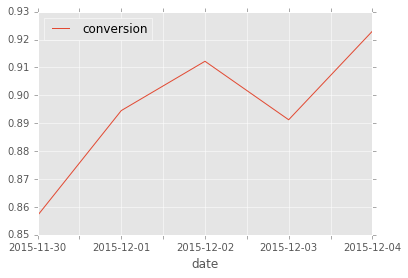

In [9]:
test_conversion_by_day = filter_df[filter_df['test']==1].groupby('date')['conversion'].mean()
control_conversion_by_day = filter_df[filter_df['test']==0].groupby('date')['conversion'].mean()
test_vs_control = test_conversion_by_day/control_conversion_by_day

test_vs_control.reset_index().set_index('date').plot()

In [16]:
combined_df

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35,Mexico
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0,M,22,Spain
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33,Mexico


In [27]:
from sklearn import tree 
clf = tree.DecisionTreeClassifier()